# Part 0. **Introduction**

## 🏠 House Prices: Advanced Regression Techniques

## Dataset

<!-- Dataset name button -->
<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data" target="_blank" style="text-decoration:none;">
  <button style="background-color:grey; color:white; padding:12px 25px; border:none; border-radius:5px; cursor:pointer; font-size:16px;">
    House Prices Dataset
  </button>
</a>

<br><br>

<!-- Train/Test buttons -->
<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data" target="_blank" style="text-decoration:none;">
  <button style="background-color:blue; color:white; padding:10px 20px; border:none; border-radius:5px; cursor:pointer;">
    Open Train Data
  </button>
</a>

<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data" target="_blank" style="text-decoration:none;">
  <button style="background-color:green; color:white; padding:10px 20px; border:none; border-radius:5px; cursor:pointer;">
    Open Test Data
  </button>
</a>

---

## Feature Overview

| Feature Name      | Type        | Description                               |
|------------------|------------|-------------------------------------------|
| `Id`             | Integer    | Unique ID for each house                  |
| `MSSubClass`     | Categorical| Type of dwelling                          |
| `MSZoning`       | Categorical| General zoning classification             |
| `LotFrontage`    | Numeric    | Linear feet of street connected to property |
| `LotArea`        | Numeric    | Lot size in square feet                    |
| `Street`         | Categorical| Type of road access                        |
| `Alley`          | Categorical| Type of alley access                       |
| `LotShape`       | Categorical| General shape of property                  |
| `LandContour`    | Categorical| Flatness of property                        |
| `Utilities`      | Categorical| Type of utilities available                |
| `LotConfig`      | Categorical| Lot configuration                          |
| `LandSlope`      | Categorical| Slope of property                           |
| `Neighborhood`   | Categorical| Physical locations within Ames city limits |
| `Condition1`     | Categorical| Proximity to main road or railroad         |
| `Condition2`     | Categorical| Secondary proximity                         |
| `BldgType`       | Categorical| Type of dwelling                            |
| `HouseStyle`     | Categorical| Style of dwelling                           |
| `OverallQual`    | Numeric    | Overall material and finish quality (1–10) |
| `OverallCond`    | Numeric    | Overall condition rating (1–10)            |
| `YearBuilt`      | Numeric    | Original construction year                  |
| `YearRemodAdd`   | Numeric    | Remodel year (if any)                       |
| `RoofStyle`      | Categorical| Type of roof                                |
| `RoofMatl`       | Categorical| Roof material                               |
| `Exterior1st`    | Categorical| Exterior covering on house                  |
| `Exterior2nd`    | Categorical| Exterior covering on house (if multiple)   |
| `MasVnrType`     | Categorical| Masonry veneer type                          |
| `MasVnrArea`     | Numeric    | Masonry veneer area in sq ft                 |
| `ExterQual`      | Categorical| Exterior material quality                    |
| `ExterCond`      | Categorical| Exterior material condition                  |
| ...              | ...        | ...                                         |

> **Note:** There are 79 features in total. You can continue the table for all remaining features.

---

# Part 1. **Setup & Data Loading**

## 1.1 **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 **Load Data(Train and Test)**

In [2]:
df_train = pd.read_csv('train_house_prices.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv('test_house_prices.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 1.3 **Missing Values Check**

In [4]:
df_train.info()
df_train.isna().sum().sort_values(ascending=False).head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
BldgType           0
Neighborhood       0
LandSlope          0
LotConfig          0
Condition1         0
dtype: int64

In [5]:
df_train.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType','FireplaceQu','Utilities'], inplace=True)

In [6]:
df_test.info()
df_test.isna().sum().sort_values(ascending=False).head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
dtype: int64

In [7]:
df_test.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType','FireplaceQu'], inplace=True)

# Part 2. **Exploratory Data Analysis (EDA)**

## 2.1 **Descriptive Statistics**

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 2.2 **Data Cleaning**

In [10]:
for col in df_test.columns:
    if df_test[col].isna().sum() > 0:  
        if df_test[col].dtype == 'int64' or df_test[col].dtype == 'float64': # If I fill from train data will become to overfitting
            df_test[col] = df_test[col].fillna(df_test[col].median())
        else:
            df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [11]:
for col in df_train.columns:
    if df_train[col].isna().sum() > 0:  # I get info that solving problem of missing values better do with test data
        if df_test[col].dtype == 'int64' or df_test[col].dtype == 'float64':
            df_test[col] = df_test[col].fillna(df_test[col].median())
        else:
            df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
    if df_train[col].isna().sum() > 0: # I check that I have datapont difference between train and test datas and I fill it by itself
        if df_train[col].dtype == 'int64' or df_train[col].dtype == 'float64':
            df_train[col] = df_train[col].fillna(df_train[col].median())
        else:
            df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

In [12]:
df_test.isna().sum().sort_values(ascending=False).head(25)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
dtype: int64

In [13]:
df_train.isna().sum().sort_values(ascending=False).head(25)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
dtype: int64

## 2.3 **Distribution Analysis**

### **1. For Numerical Features**

In [14]:
train = pd.get_dummies(df_train.drop(columns=['Id']), drop_first=True)

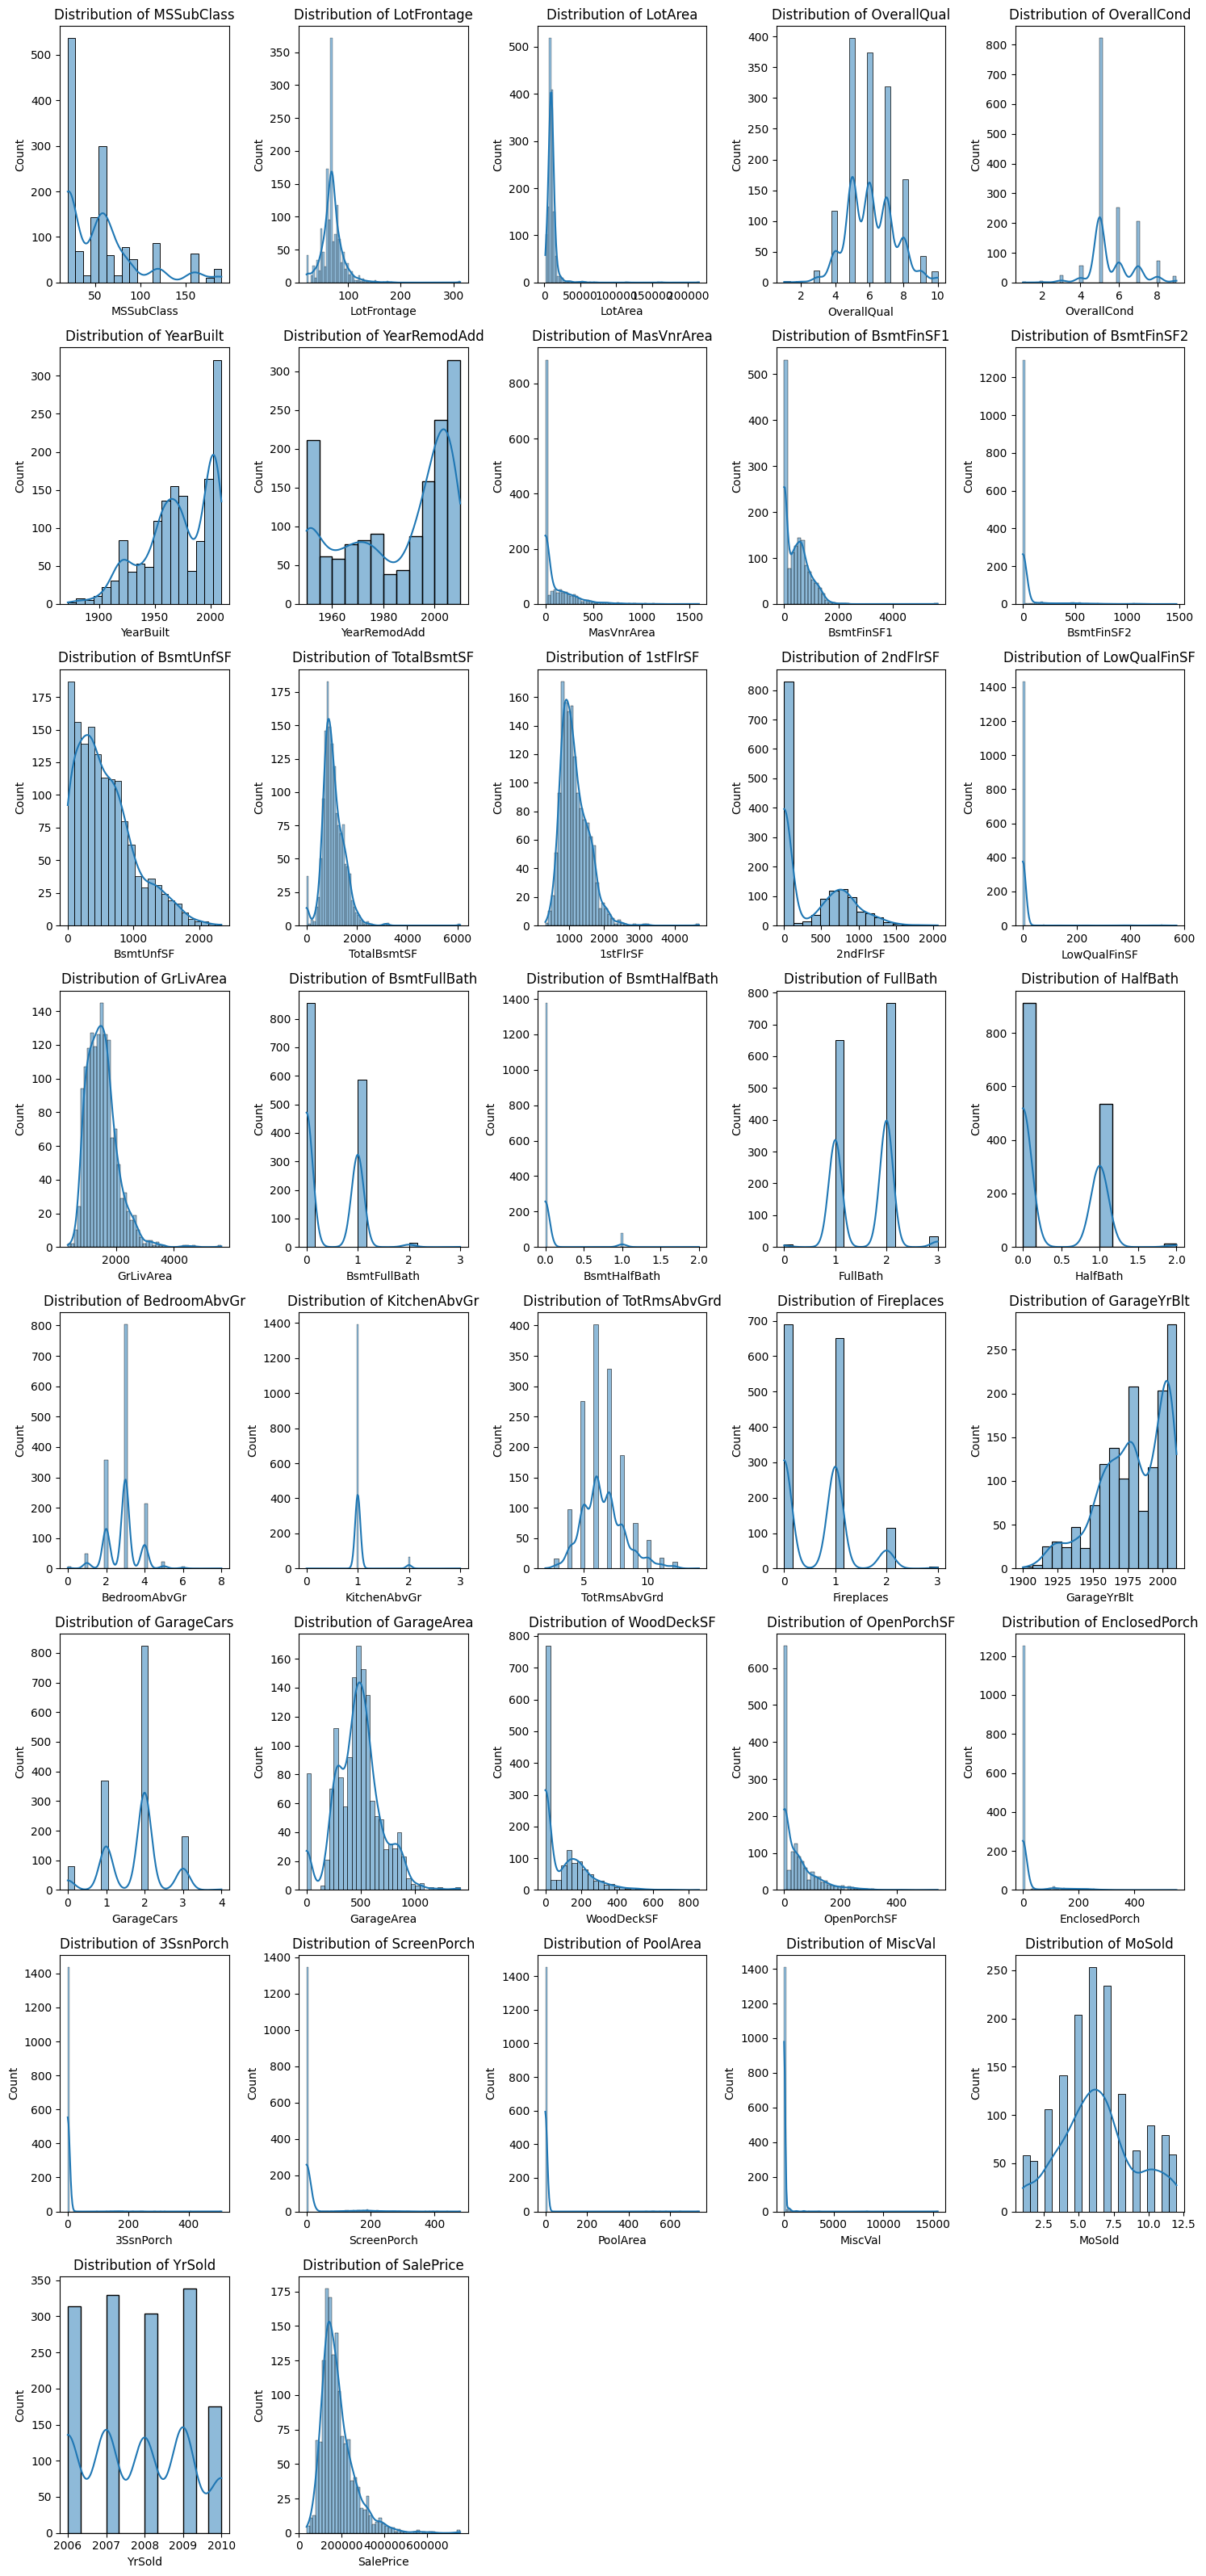

In [15]:
num_df = train.select_dtypes(include=['float64','int64']).columns 
n_cols = 5 
n_rows = (len(num_df) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

axes = axes.flatten()

for i, col in enumerate(num_df):
    sns.histplot(data=df_train, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 2.4 **Correlation Analysis**

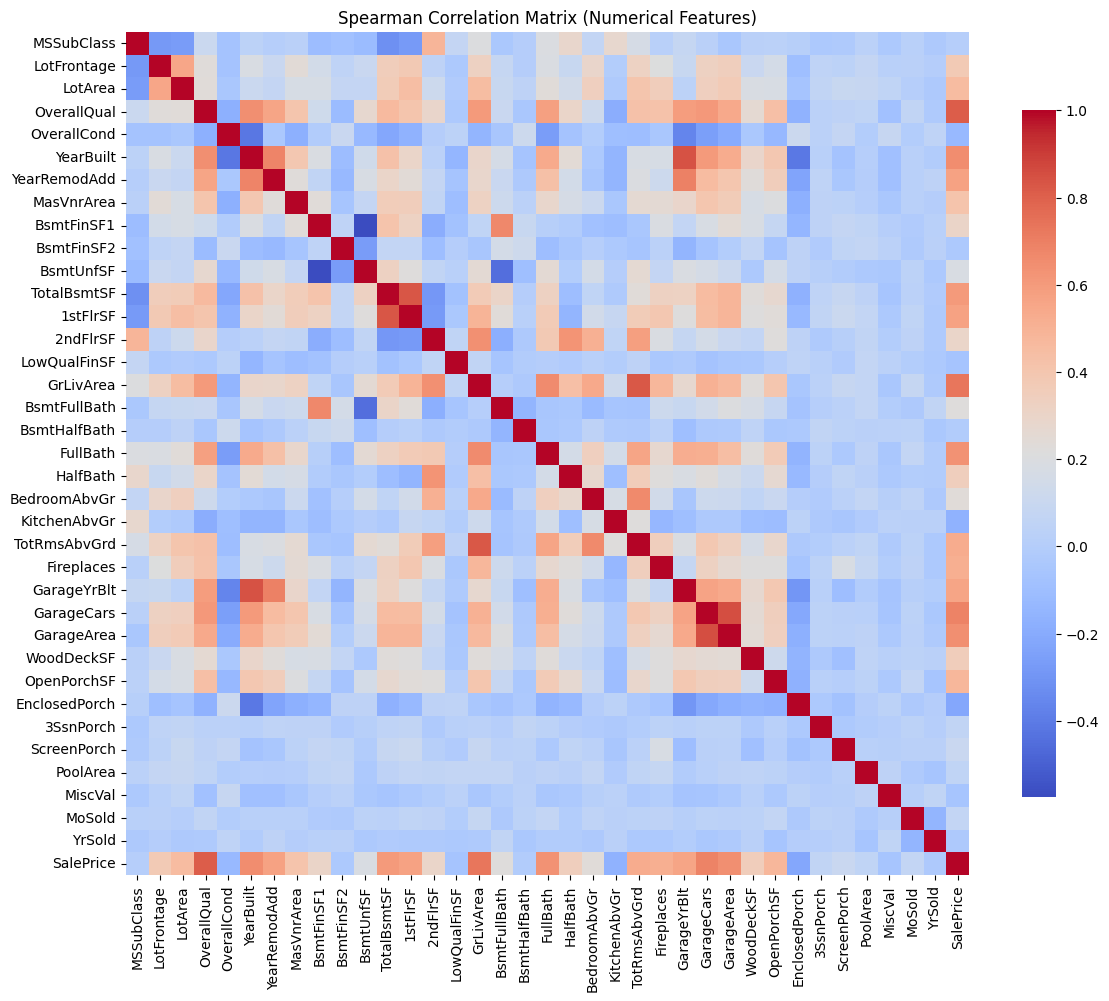

In [16]:
corr_matrix_num = train[num_df].corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_num, annot=False, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Spearman Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

## 2.5 **Outlier Detection**

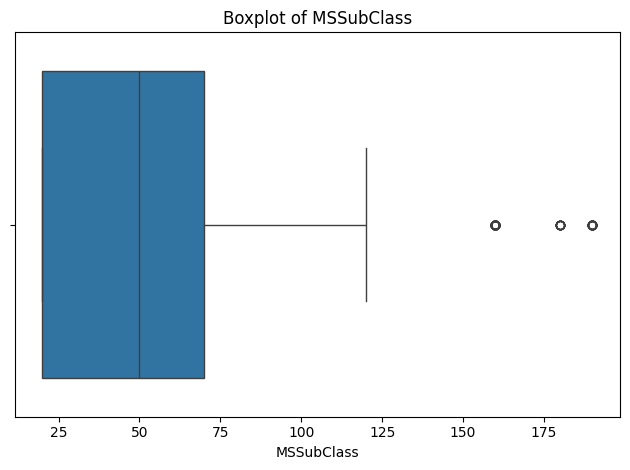

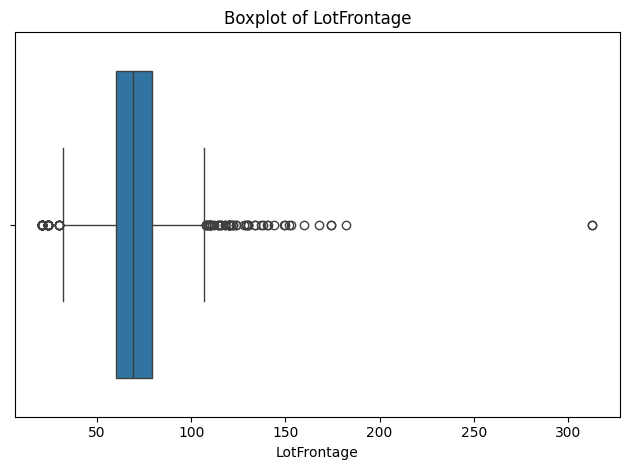

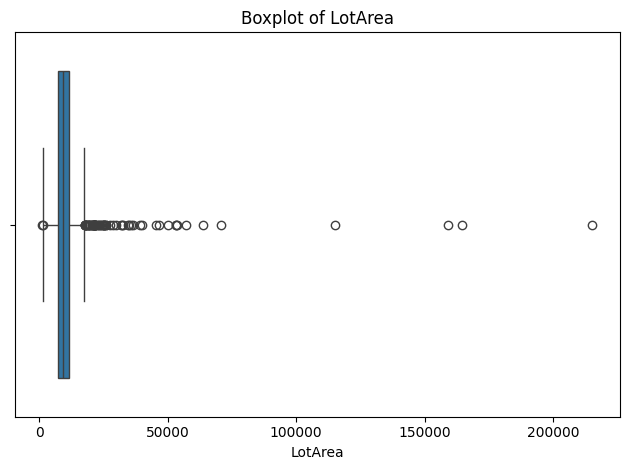

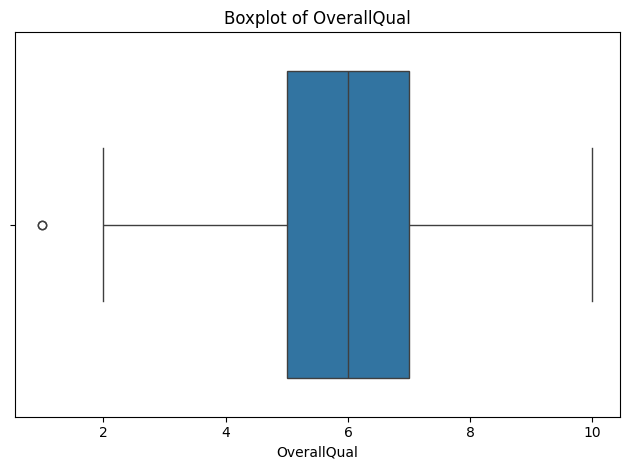

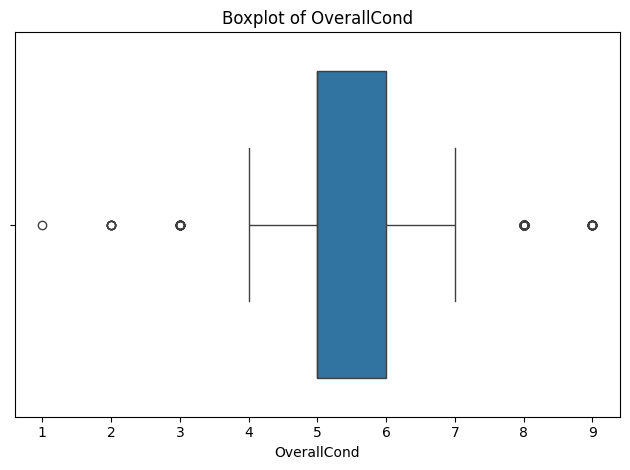

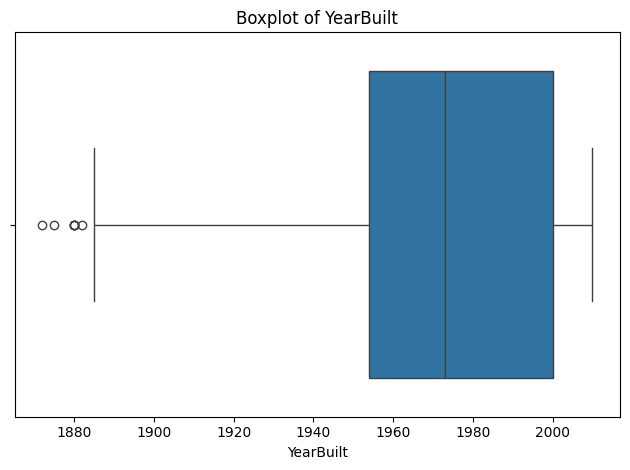

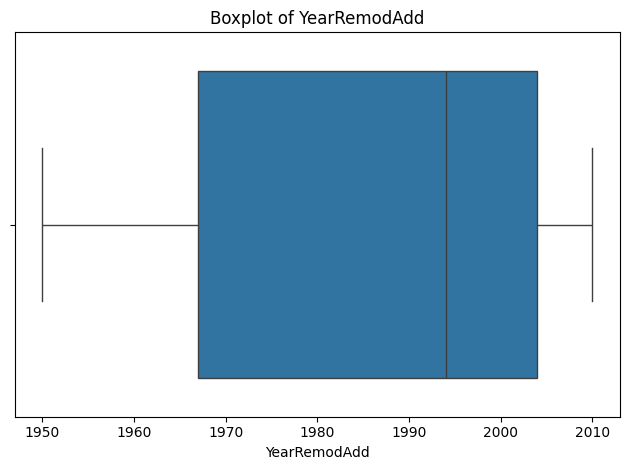

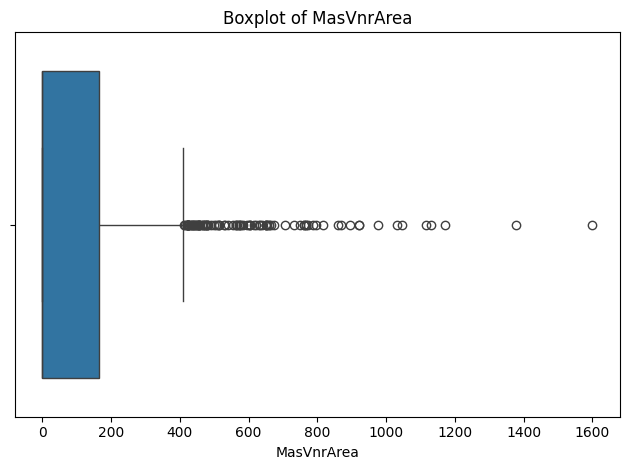

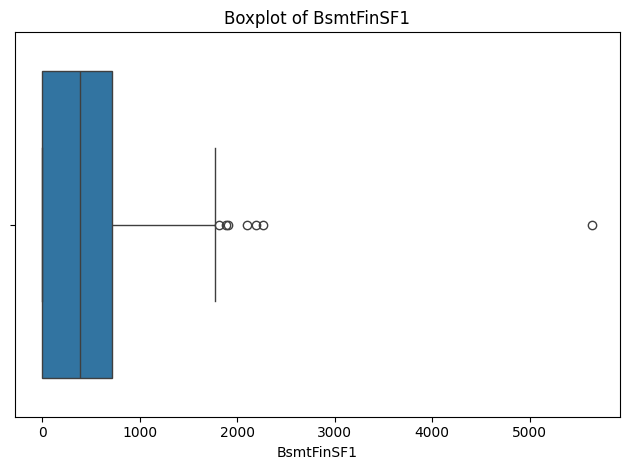

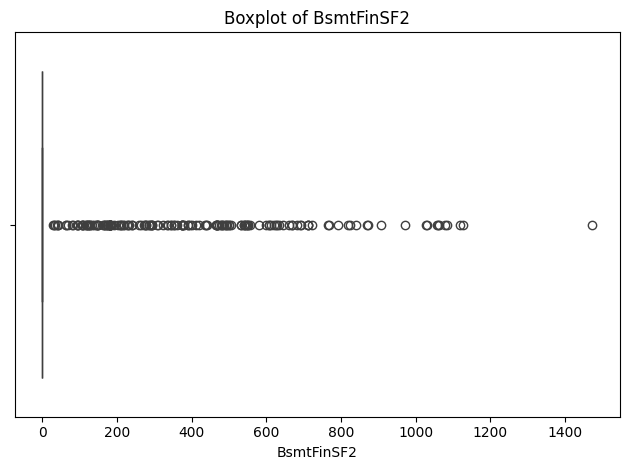

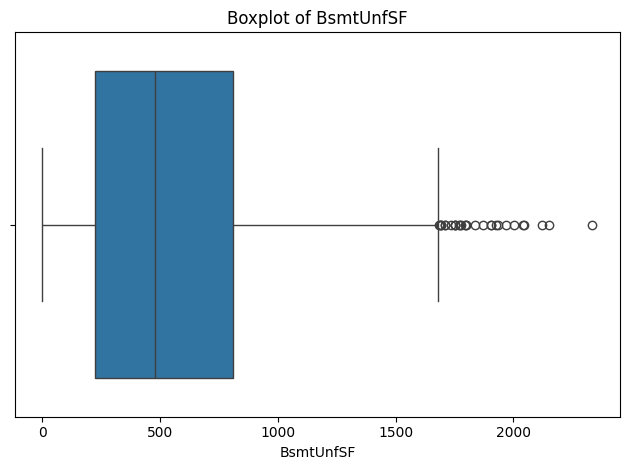

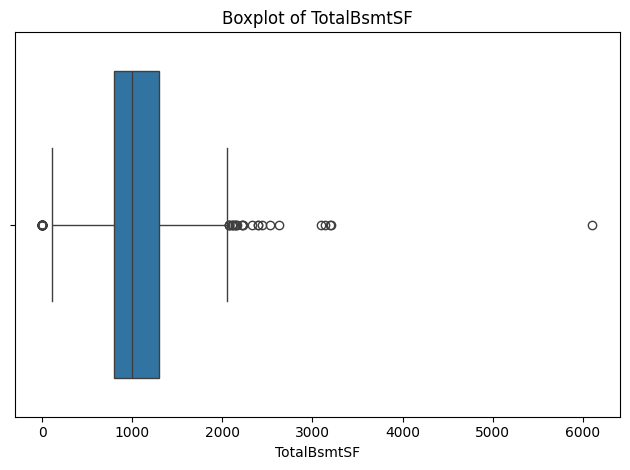

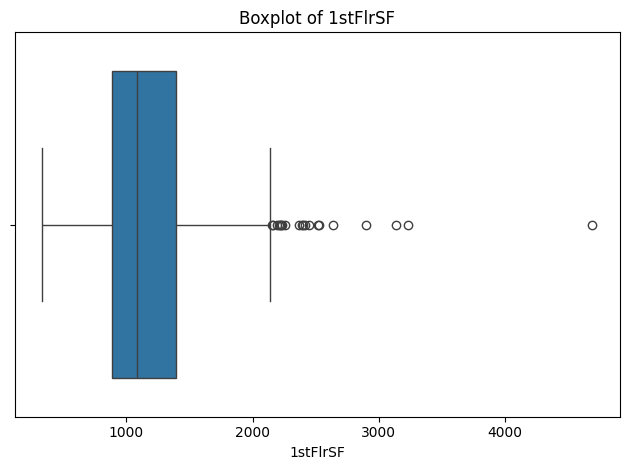

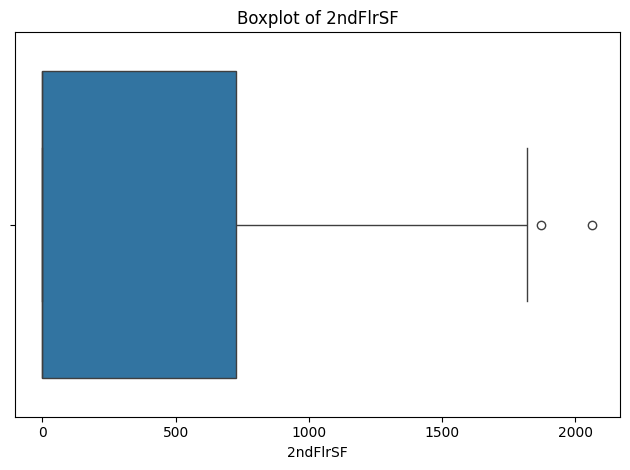

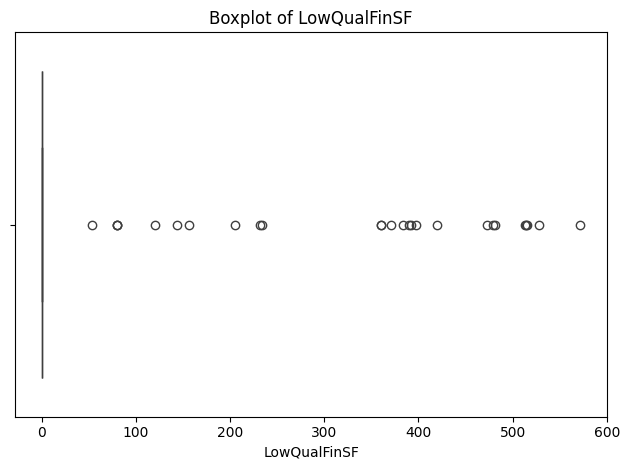

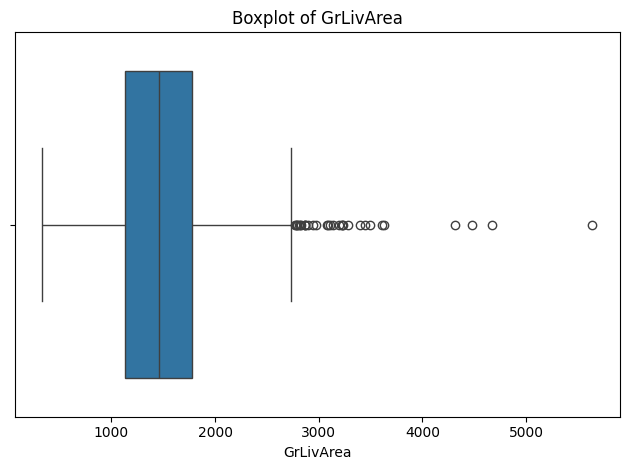

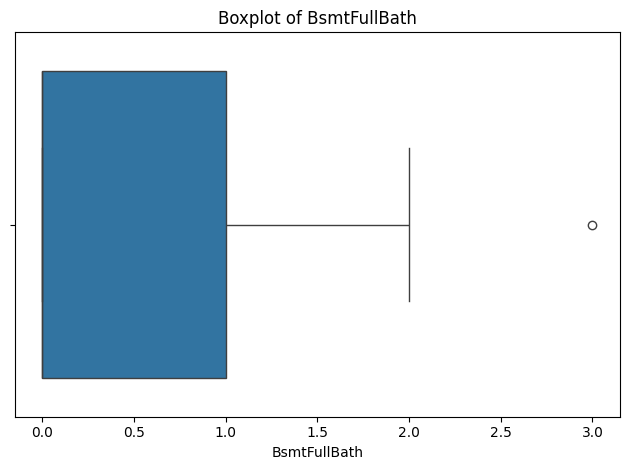

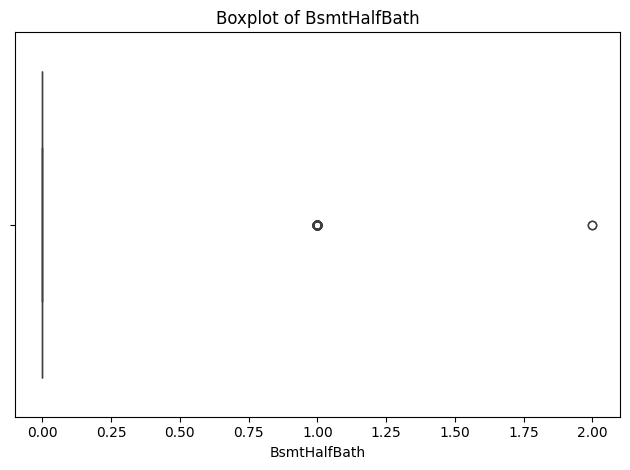

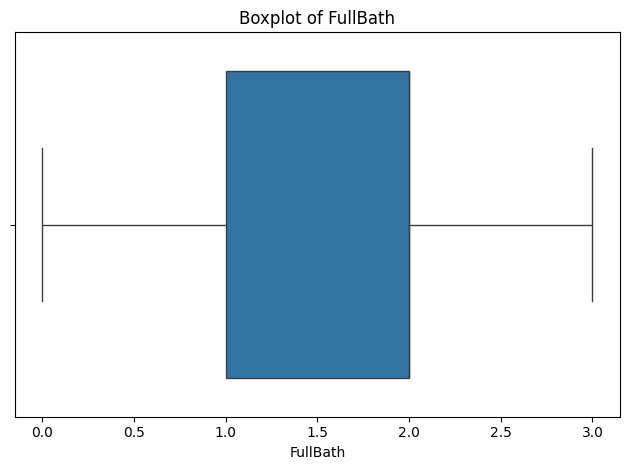

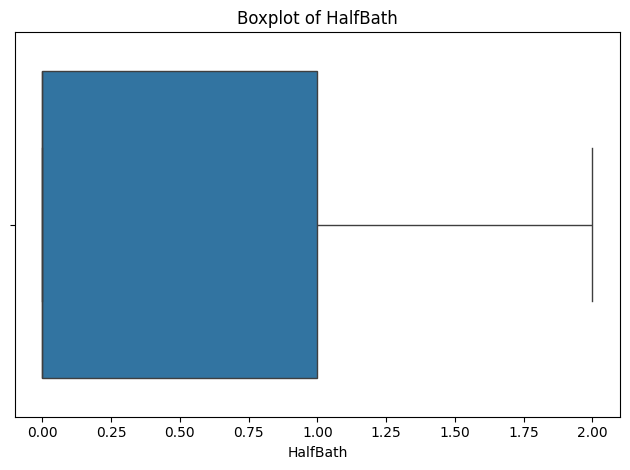

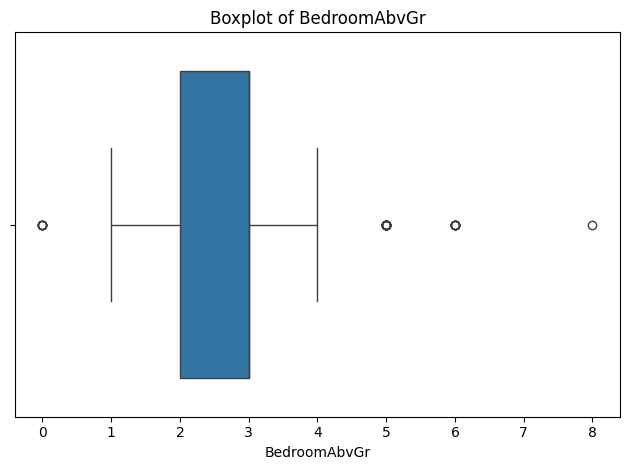

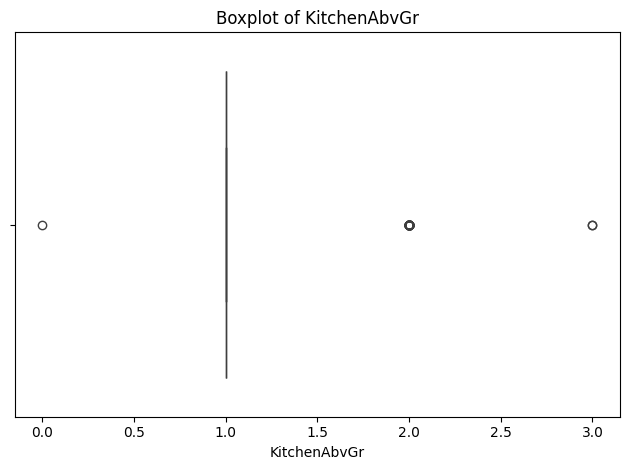

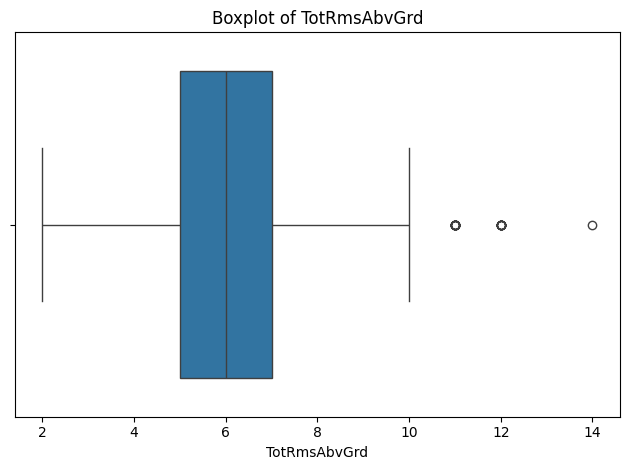

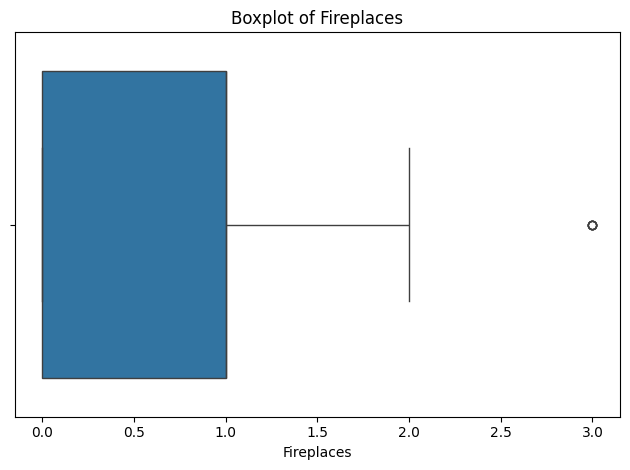

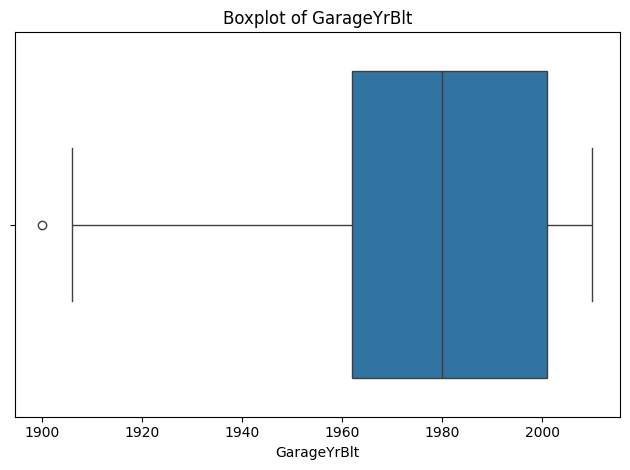

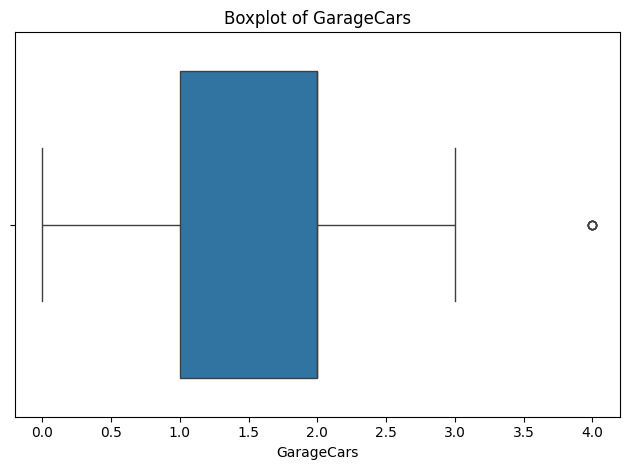

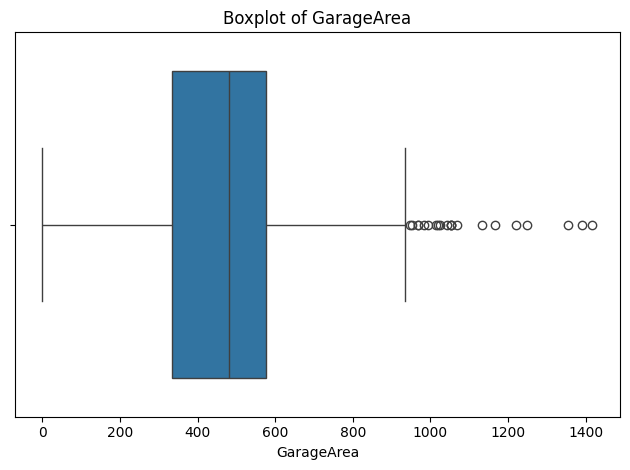

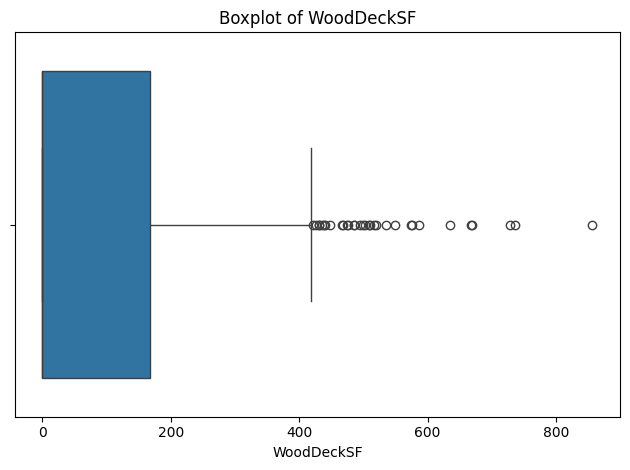

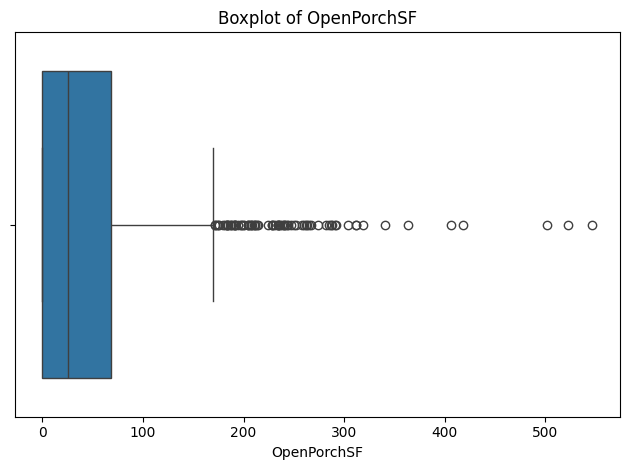

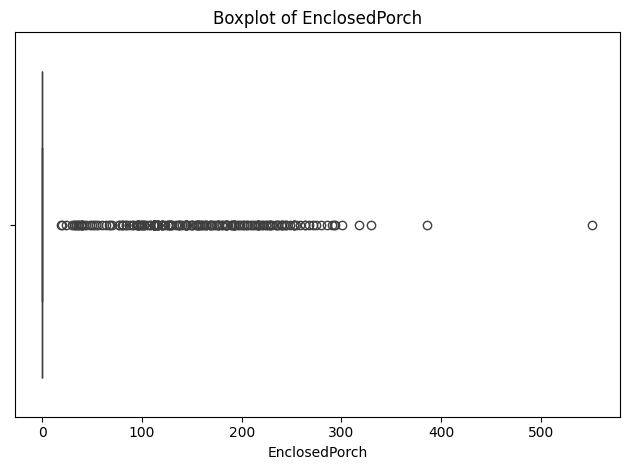

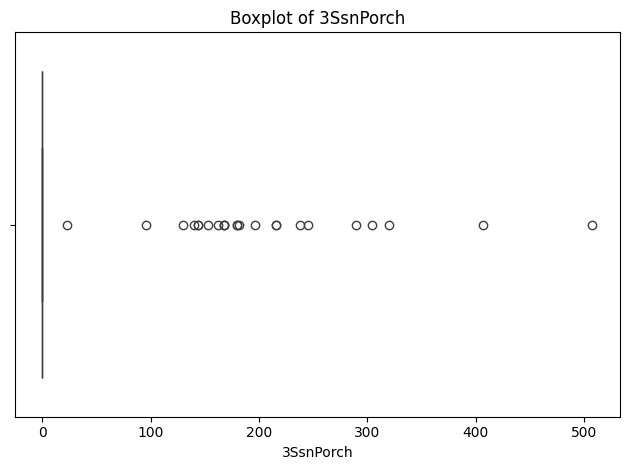

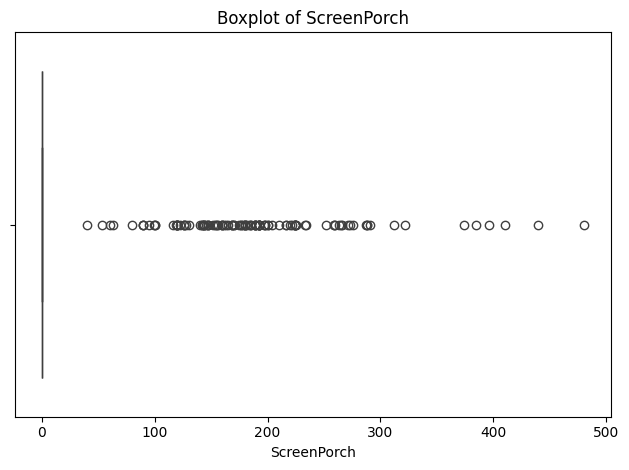

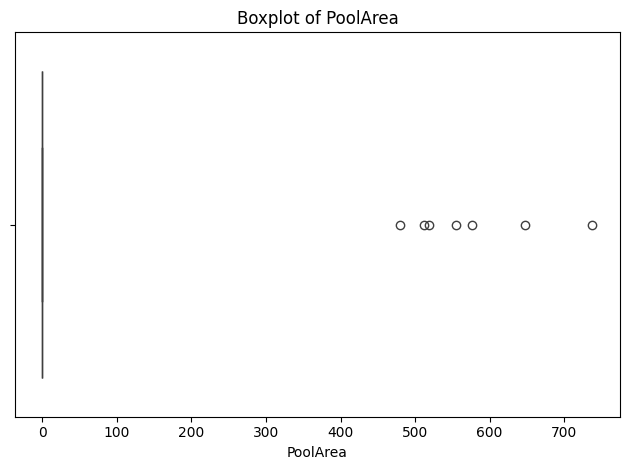

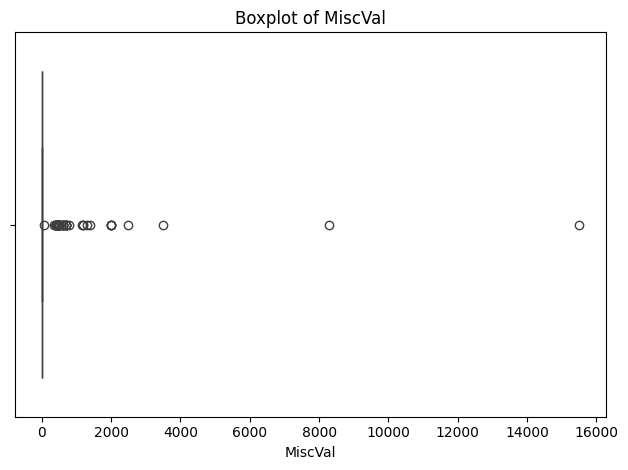

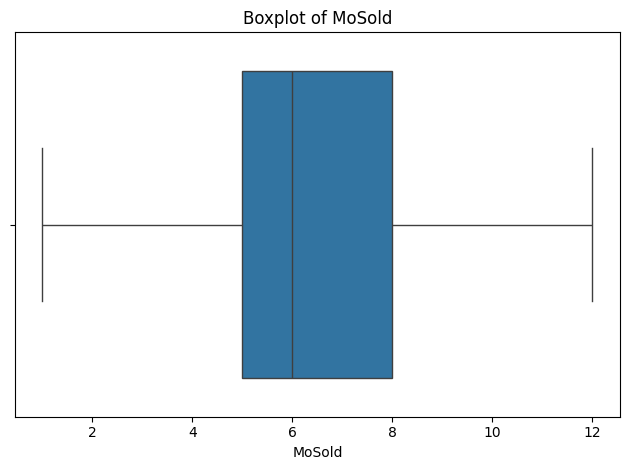

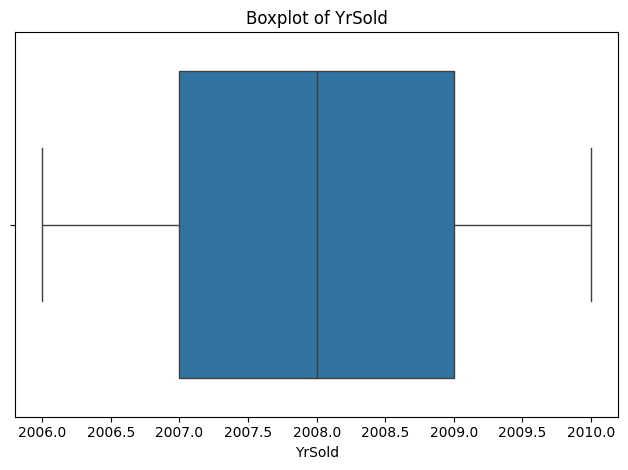

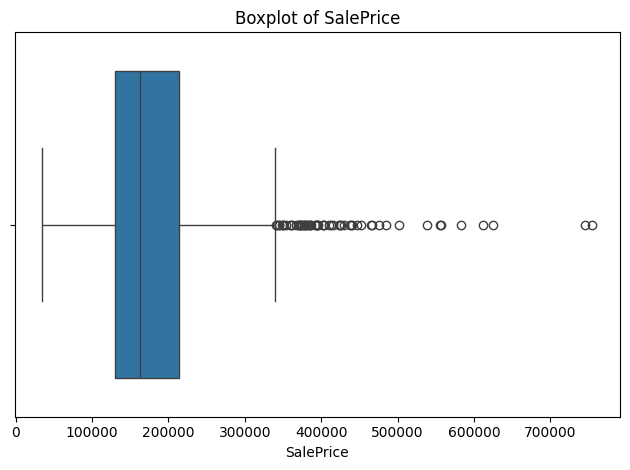

In [17]:
for col in num_df:
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Part 3. **Feature Engineering**

## 3.1 **Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder
class CustomLabelEncoder:
    def __init__(self):
        self.label_encoders = {}
    def encode_categorical_inplace(self, train_df, test_df, top_n_high_card=5):
        """
        Encode categorical features by updating existing columns only:
        - Binary (2 unique): LabelEncode in place.
        - Low cardinality (≤10): Map categories to integers directly.
        - Medium cardinality (11–20): Frequency encode in place.
        - High cardinality (>20): Map Top-N categories to 1..N and others to 0.
        """

        categorical_cols = df_train.select_dtypes(include=['object']).columns

        for col in categorical_cols:
            n_unique = df_train[col].nunique()

            # === 1. Binary ===
            if n_unique == 2:
                le = LabelEncoder()
                df_train[col] = le.fit_transform(df_train[col].fillna('None'))
                df_test[col] = df_test[col].fillna('None')
                df_test[col] = df_test[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
                df_test[col] = le.transform(df_test[col])
                self.label_encoders[col] = le

            # === 2. Low cardinality → Simple integer map ===
            elif n_unique <= 10:
                categories = {cat: idx for idx, cat in enumerate(df_train[col].fillna('None').unique())}
                df_train[col] = df_train[col].fillna('None').map(categories)
                df_test[col] = df_test[col].fillna('None').map(categories).fillna(-1).astype(int)

            # === 3. Medium cardinality → Frequency encode ===
            elif n_unique <= 20:
                freqs = df_train[col].fillna('None').value_counts(normalize=True)
                df_train[col] = df_train[col].fillna('None').map(freqs)
                df_test[col] = df_test[col].fillna('None').map(freqs).fillna(0)

            # === 4. High cardinality → Top-N categories map ===
            else:
                top_categories = df_train[col].value_counts().nlargest(top_n_high_card).index
                def map_top(x):
                    return list(top_categories).index(x) + 1 if x in top_categories else 0
                df_train[col] = df_train[col].map(map_top)
                df_test[col] = df_test[col].map(map_top)

        return df_train, df_test, self.label_encoders

## 3.2 **Feature Creating**

In [19]:
class FeatureCreator:
    def __init__(self):
        pass
    
    def create_features(self, df):
        df['Total bathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
        df['Total porches'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
        df['Total square feet'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea'] + df['WoodDeckSF'] + df['PoolArea']
        df['Age of the house'] = 2025 - df['YearBuilt']
        df['Years since remodel'] = df['YrSold'] - df['YearRemodAdd']
        return df

In [20]:
class FeatureEngeener:
    def __init__(self):
        pass
    def create_features(self, df):
        cr = FeatureCreator()
        df = cr.create_features(df)
        return df
    def encode_categorical_inplace(self, train_df, test_df, top_n_high_card=5):
        cle = CustomLabelEncoder()
        train_df, test_df, self.label_encoders = cle.encode_categorical_inplace(train_df, test_df, top_n_high_card)
        return train_df, test_df, self.label_encoders

In [21]:
fe = FeatureEngeener()
df_train = fe.create_features(df_train)
df_test = fe.create_features(df_test)
df_train, df_test, label_encoders = fe.encode_categorical_inplace(df_train, df_test, top_n_high_card=5)

# Part 4 **Feature Scaling**

## 4.1 **Standardization**

In [22]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

class DataPreprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.num_cols = None
    def fit_transform(self, df_train, df_test):
        num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
        for col in num_cols:
            if col != 'SalePrice':
                df_train[col] = scaler.fit_transform(df_train[[col]])
                df_test[col] = scaler.transform(df_test[[col]])

data_preprocessor = DataPreprocessor()
data_preprocessor.fit_transform(df_train, df_test)

# Part 5. **Modeling**

## 5.1 **Model Selection**

### Models: **Linear Regression(with Lasso Regularization), XGBoost, Random Forest**

In [23]:
from sklearn.linear_model import Lasso
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [24]:
x = df_train.drop(columns=['SalePrice','Id'])
y = df_train['SalePrice'].values

## 5.2 **Feature Selection viewing by importance**

In [25]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)

feature_names = list(x.columns)
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(20)

,Feature,Importance
74,Total square feet,0.609821
14,OverallQual,0.178006
40,2ndFlrSF,0.027922
75,Age of the house,0.011355
30,BsmtFinSF1,0.009973
42,GrLivArea,0.008945
3,LotArea,0.008494
16,YearBuilt,0.008439
76,Years since remodel,0.008198
72,Total bathrooms,0.007096


In [26]:
keep_features = feature_importance_df['Feature'].head(20).tolist()
X = x[keep_features]

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.3 **Hyperparametrs tuning by **GridSearch****

In [30]:
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

# NOTE: On some environments the parallel backend can attempt to import
# internal POSIX modules (e.g. '_posixsubprocess') and raise ModuleNotFoundError.
# Use n_jobs=1 (no multiprocessing) or a threading backend to avoid that issue.

# 1. Lasso hyperparameter tuning
lasso = Lasso(
    random_state=42,
    max_iter=1000,
    tol=0.0001
)
param_grid_lasso = {
    "alpha": [1, 7.5, 8.9, 10.0]
}
grid_search_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid_lasso,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=1,
    verbose=0
)
grid_search_lasso.fit(X_train, y_train)

# 2. XGBoost hyperparameter tuning
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    use_label_encoder=False
)

param_grid_xgb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [4, 5, 6],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "reg_alpha": [0.05, 0.1],
    "reg_lambda": [1.0, 2.0]
}
grid_search_xgb = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_xgb,
    scoring=rmse_scorer,
    cv=3,
    n_jobs=1,
    verbose=0
)
grid_search_xgb.fit(X_train, y_train)

# 3. Random Forest hyperparameter tuning
rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [8, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring=rmse_scorer,
    cv=5,
    n_jobs=1,
    verbose=0
)
grid_search_rf.fit(X_train, y_train)


print("\n--- Lasso Results ---")
print("Best Parameters:", grid_search_lasso.best_params_)
print("Best RMSE:", -grid_search_lasso.best_score_)

print("\n--- XGBoost Results ---")
print("Best Parameters:", grid_search_xgb.best_params_)
print("Best RMSE:", -grid_search_xgb.best_score_)

print("\n--- Random Forest Results ---")
print("Best Parameters:", grid_search_rf.best_params_)
print("Best RMSE:", -grid_search_rf.best_score_)

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+11, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.345e+10, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec


--- Lasso Results ---
Best Parameters: {'alpha': 10.0}
Best RMSE: 36500.4031295875

--- XGBoost Results ---
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.9}
Best RMSE: 27159.405897366945

--- Random Forest Results ---
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 29371.002186091813


## 5.4 **Hyperparameters Setup**

In [31]:
hyperparams_lasso = grid_search_lasso.best_params_
hyperparams_xgb = grid_search_xgb.best_params_
hyperparams_rf = grid_search_rf.best_params_

## 5.5 **Model Imports**

### **1. Linear Regression with Lasso**

In [32]:
model_ls = Lasso(**hyperparams_lasso)

### 2. **XGBooost**

In [33]:
model_xgb = XGBRegressor(**hyperparams_xgb)

### 3. **Random Forest**

In [34]:
model_rf = RandomForestRegressor(**hyperparams_rf)

# Part 6. **Training**

## 6.1 **Fit Models**

### **1. Linear Regression with Lasso**

In [35]:
model_ls.fit(X_train, y_train)

,alpha,10.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### 2. **XGBooost**

In [36]:
model_xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### 3. **Random Forest**

In [37]:
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 6.2 **Training Progress**

In [38]:
y_pred_ls = model_ls.predict(X_train)
y_pred_xgb = model_xgb.predict(X_train)
y_pred_rf = model_rf.predict(X_train)

# Part 7. **Evaluation & Metrics**

## 7.1 **Predict on Train and Test Sets**

In [39]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [40]:
rmse_ls = root_mean_squared_error(y_train, y_pred_ls)
mae_ls = mean_absolute_error(y_train, y_pred_ls)
r2_ls = r2_score(y_train, y_pred_ls)

In [41]:
rmse_xgb = root_mean_squared_error(y_train, y_pred_xgb)
mae_xgb = mean_absolute_error(y_train, y_pred_xgb)
r2_xgb = r2_score(y_train, y_pred_xgb)

In [42]:
rmse_rf = root_mean_squared_error(y_train, y_pred_rf)
mae_rf = mean_absolute_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)

## 7.2 **Calculate Metrics**

In [43]:
print(f'LR with Lasso - RMSE: {rmse_ls}, MAE: {mae_ls}, R2: {r2_ls}')

LR with Lasso - RMSE: 34835.567965061426, MAE: 20951.118263980956, R2: 0.7965451344724652


In [44]:
print(f'XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}, R2: {r2_xgb}')

XGBoost - RMSE: 8335.7802734375, MAE: 6213.353515625, R2: 0.9883502721786499


In [45]:
print(f"Random Forest - RMSE: {rmse_rf}, MAE: {mae_rf}, R2: {r2_rf}")

Random Forest - RMSE: 12606.506943025695, MAE: 8183.6014490239195, R2: 0.9733552393414991


# Part 8. **Creating Answer**

### 1. **Linear Regression with Lasso Regularization**

In [46]:
df_test = df_test[keep_features]
submission_ls = pd.DataFrame({
    'ID': df_test.index + 1461,
    'SalePrice': model_ls.predict(df_test.values)
})
submission_ls.to_csv('../submission/house_price_predictions_lasso.csv', index=False)

print("submission.csv by LR Lasso file successfully created!")
print(submission_ls.head())

df = pd.read_csv('../submission/sample_submission_house_prices.csv')

r2 = r2_score(df['SalePrice'], submission_ls['SalePrice'])
print(f'LR Lasso R2 score for submission: {r2}')
mae = mean_absolute_error(df['SalePrice'], submission_ls['SalePrice'])
print(f'LR Lasso MAE score for submission: {mae}')
rmse = root_mean_squared_error(df['SalePrice'], submission_ls['SalePrice'])
print(f'LR Lasso RMSE score for submission: {rmse}')

submission.csv by LR Lasso file successfully created!
     ID      SalePrice
0  1461  126651.210172
1  1462  158128.987859
2  1463  174416.122811
3  1464  198871.299855
4  1465  199779.068390
LR Lasso R2 score for submission: -15.723336722580516
LR Lasso MAE score for submission: 53050.83584962623
LR Lasso RMSE score for submission: 67527.08658971409


c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### 2. **XGBoost**

In [47]:
submission_xgb = pd.DataFrame({
    'ID': df_test.index + 1461,
    'SalePrice': model_xgb.predict(df_test.values)
})
submission_xgb.to_csv('../submission/house_price_predictions_xgb.csv', index=False)

print("submission.csv by XGBoost file successfully created!")
print(submission_xgb.head())

df = pd.read_csv('../submission/sample_submission_house_prices.csv')

r2 = r2_score(df['SalePrice'], submission_xgb['SalePrice'])
print(f'XGBoost R2 score for submission: {r2}')
mae = mean_absolute_error(df['SalePrice'], submission_xgb['SalePrice'])
print(f'XGBoost MAE score for submission: {mae}')
rmse = root_mean_squared_error(df['SalePrice'], submission_xgb['SalePrice'])
print(f'XGBoost RMSE score for submission: {rmse}')

submission.csv by XGBoost file successfully created!
     ID      SalePrice
0  1461  140938.750000
1  1462  182132.343750
2  1463  189254.859375
3  1464  194462.578125
4  1465  181018.234375
XGBoost R2 score for submission: -17.7226538942217
XGBoost MAE score for submission: 54123.95227519828
XGBoost RMSE score for submission: 71449.67376014496


### 3. **Random Forest**

In [48]:
submission_rf = pd.DataFrame({
    'ID': df_test.index + 1461,
    'SalePrice': model_rf.predict(df_test.values)
})
submission_rf.to_csv('../submission/house_price_predictions_rf.csv', index=False)

print("submission.csv by Random Forest file successfully created!")
print(submission_rf.head())

df = pd.read_csv('../submission/sample_submission_house_prices.csv')

r2 = r2_score(df['SalePrice'], submission_rf['SalePrice'])
print(f'Random Forest R2 score for submission: {r2}')
mae = mean_absolute_error(df['SalePrice'], submission_rf['SalePrice'])
print(f'Random Forest MAE score for submission: {mae}')
rmse = root_mean_squared_error(df['SalePrice'], submission_rf['SalePrice'])
print(f'Random Forest RMSE score for submission: {rmse}')

submission.csv by Random Forest file successfully created!
     ID      SalePrice
0  1461  140360.343671
1  1462  169313.644221
2  1463  193027.406278
3  1464  199611.739445
4  1465  174509.501415
Random Forest R2 score for submission: -17.02578419143585
Random Forest MAE score for submission: 53133.38899124838
Random Forest RMSE score for submission: 70107.36256233104


c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## **LR Lasso Score: 0.54425**

## **Random Forest Score: 0.15069**

## **XGBoost Score: 0.14007 and this is the best Score**

# Part 9. **Conclusion**

### From this experience, we learned important lessons about **analyzing data and building predictive models**:

- Identifying which features have the strongest impact helps prioritize efforts and improve model performance.  
- Handling missing values and properly encoding categorical variables is essential for accurate predictions.  
- Exploring trends, correlations, and potential outliers allows us to make more informed decisions.  
- Feature engineering, visualization, and understanding relationships in the data are key to building effective machine learning models.  
- Selecting appropriate models and evaluating them using metrics such as **RMSE** or **MAE** helps assess performance and guide improvements.  
- Iteratively refining models through **cross-validation and hyperparameter tuning** strengthens predictive accuracy and robustness.  

> Overall, this experience reinforces the importance of careful analysis, thoughtful preparation, and systematic evaluation to achieve reliable and accurate predictions.

# Part 10 **Sources**

> https://www.geeksforgeeks.org/machine-learning/implementation-of-lasso-regression-from-scratch-using-python/

> https://medium.com/@venky89.ai/feature-selection-in-machine-learnig-using-variance-threshold-a120366eec2f